# **Exploratory Data Analysis - Titanic dataset**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**The Data**

Lets start by reading data

In [ ]:
train = pd.read_csv("train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# **Exploratory data Analysis**
First, we check the missing data

# **Missing Data**
We use seaborn to create a heatmap to see where are missing data

In [ ]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


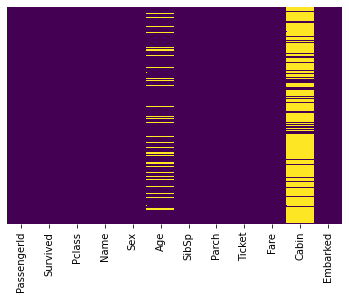

In [ ]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Roughly 20% of age data is missing

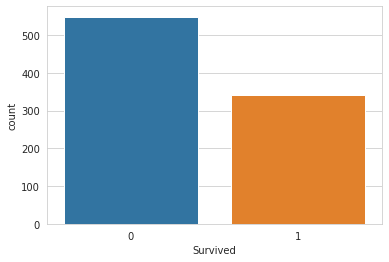

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=train)

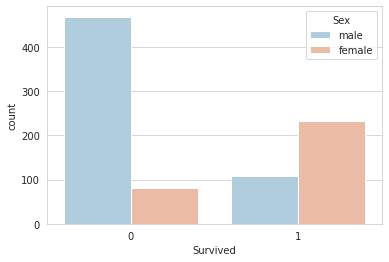

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

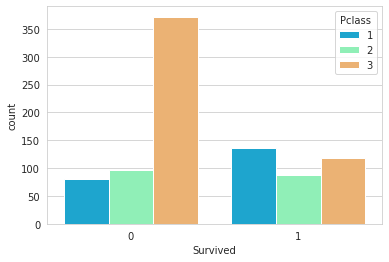

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

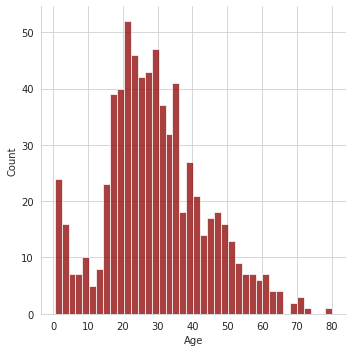

In [ ]:
sns.displot(train['Age'].dropna(),kde=False,color='darkred',bins=40)

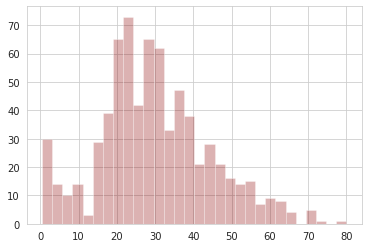

In [ ]:
train['Age'].hist(bins=30,color='darkred',alpha=0.3)

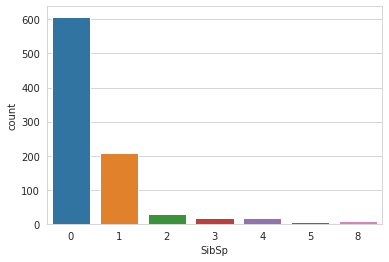

In [ ]:
sns.countplot(x='SibSp',data=train)

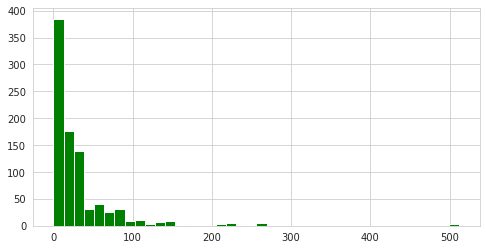

In [ ]:
train['Fare'].hist(color='green',bins=40,figsize=(8,4))

# **Data Cleaning**
We have a lot of missing data in age and cabins.
We can find average and replace NaN values with it.

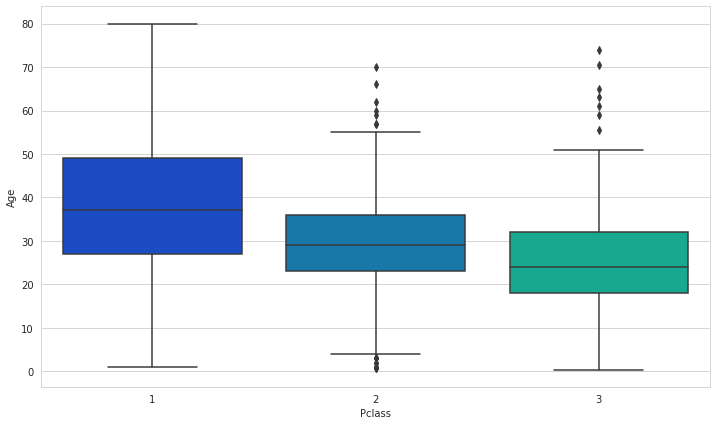

In [ ]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

In [ ]:
def impute_age(cols):
  Age = cols[0]
  Pclass = cols[1]

  if pd.isnull(Age):
    if Pclass == 1:
      return 37
    elif Pclass == 2:
      return 29
    else:
      return 24

  else:
    return Age

Now apply that function

In [ ]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

Now lets check the heatmap

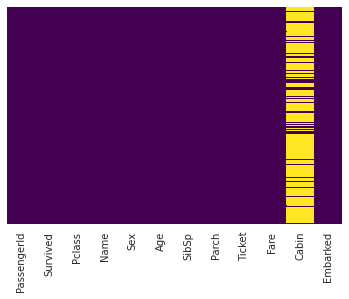

In [ ]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Now we drop the cabin column as it has too many null values

In [ ]:
train.drop('Cabin',axis=1,inplace=True)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


# **Converting categorical features**
Now we convert categorical features like sex and embark to dummy variable using pandas.

In [ ]:
pd.get_dummies(train['Embarked'],drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [ ]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [ ]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [ ]:
train = pd.concat([train,sex,embark],axis=1)
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


Our data is ready for model !

# **Building test data**

In [ ]:
test = pd.read_csv("test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


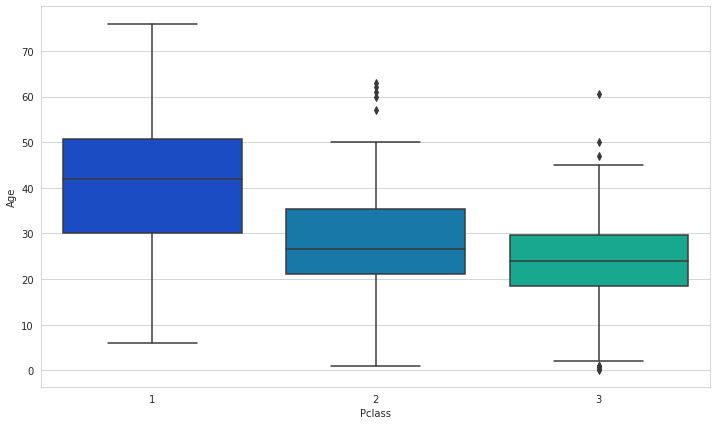

In [ ]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=test,palette='winter')

In [ ]:
def impute_age_test(cols):
  Age = cols[0]
  Pclass = cols[1]

  if pd.isnull(Age):
    if Pclass == 1:
      return 42
    elif Pclass == 2:
      return 26
    else:
      return 24

  else:
    return Age

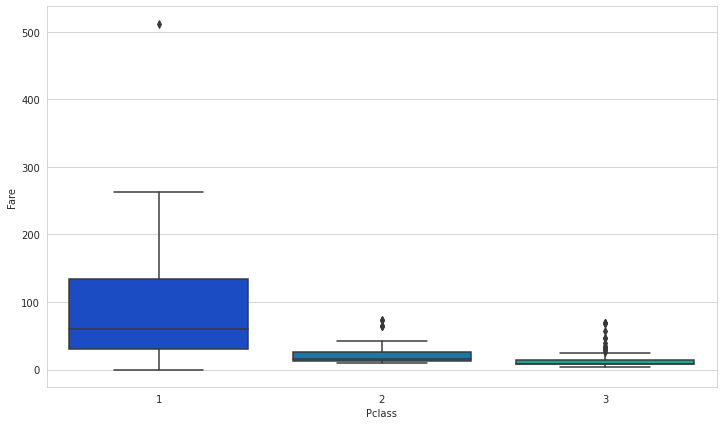

In [ ]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Fare',data=test,palette='winter')

In [ ]:
def impute_fare_test(cols):
  Fare = cols[0]
  Pclass = cols[1]

  if pd.isnull(Fare):
    if Pclass == 1:
      return 60
    elif Pclass == 2:
      return 20
    else:
      return 10

  else:
    return Fare

In [ ]:
test['Fare'] = test[['Fare','Pclass']].apply(impute_fare_test,axis=1)

In [ ]:
test['Age'] = test[['Age','Pclass']].apply(impute_age_test,axis=1)
test.drop('Cabin',axis=1,inplace=True)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [ ]:
sex_test = pd.get_dummies(test['Sex'],drop_first=True)
embark_test = pd.get_dummies(test['Embarked'],drop_first=True)

In [ ]:
test.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [ ]:
test = pd.concat([test,sex_test,embark_test],axis=1)
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,0
3,895,3,27.0,0,0,8.6625,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1


Now our test data is also ready.

# **Building a logistic regression model**


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
regressor = LogisticRegression(solver='lbfgs',max_iter=1000)

# regressor.fir(X_train,y_train)
regressor.fit(train.drop('Survived',axis=1),train['Survived'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

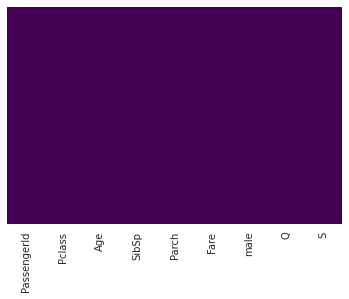

In [ ]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
predictions = regressor.predict(test)

In [ ]:
print(test)
print(predictions)

     PassengerId  Pclass   Age  SibSp  Parch      Fare  male  Q  S
0            892       3  34.5      0      0    7.8292     1  1  0
1            893       3  47.0      1      0    7.0000     0  0  1
2            894       2  62.0      0      0    9.6875     1  1  0
3            895       3  27.0      0      0    8.6625     1  0  1
4            896       3  22.0      1      1   12.2875     0  0  1
..           ...     ...   ...    ...    ...       ...   ... .. ..
413         1305       3  24.0      0      0    8.0500     1  0  1
414         1306       1  39.0      0      0  108.9000     0  0  0
415         1307       3  38.5      0      0    7.2500     1  0  1
416         1308       3  24.0      0      0    8.0500     1  0  1
417         1309       3  24.0      1      1   22.3583     1  0  0

[418 rows x 9 columns]
[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1
 1 1 0 1 0 1 0 0 0 0 0

In [ ]:
result = np.vstack([test['PassengerId'],predictions])
result = np.transpose(result)
#print(result)

In [ ]:
# Import Drive API and authenticate.
from google.colab import drive

# Mount your Drive to the Colab VM.
drive.mount('/gdrive')

# Write the DataFrame to CSV file.
with open('/gdrive/My Drive/foo.csv', 'w') as f:
  result.write(f)

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


AttributeError: ignored

In [ ]:
#print(result.size)

# save numpy array as csv file
from numpy import asarray
from numpy import savetxt
# save to csv file
savetxt('output.csv', result, delimiter=',', fmt="%d")